In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (6)\Life Expectancy Data.csv")

In [31]:
df.head(20)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [32]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [35]:
#(Categorical)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

#(Numerical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['Country', 'Status'], dtype='object')
Numerical Columns: Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [36]:
df['Life expectancy '] = df['Life expectancy '].fillna(df['Life expectancy '].mean())
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].mean())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())
df[' BMI '] = df[' BMI '].fillna(df[' BMI '].mean())
df['Polio'] = df['Polio'].fillna(df['Polio'].mean())
df['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].mean())
df['Diphtheria '] = df['Diphtheria '].fillna(df['Diphtheria '].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].mean())
df['Population'] = df['Population'].fillna(df['Population'].mean())
df[' thinness  1-19 years'] = df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean())
df[' thinness 5-9 years'] = df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean())
df['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].mean())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].mean())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())

In [37]:
print(df.isnull().sum())


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [40]:
df.columns = df.columns.str.strip()

df['Adult Mortality'] = df['Adult Mortality'].astype(int)
df['Hepatitis B'] = df['Hepatitis B'].astype(int)
df['Polio'] = df['Polio'].astype(int)
df['Diphtheria'] = df['Diphtheria'].astype(int)
df['Population'] = df['Population'].astype(int)

In [41]:
X = df.drop(columns=['Life expectancy'])
y = df['Life expectancy']

In [42]:
X = pd.get_dummies(X, drop_first=True)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4.013748887258667
Mean Absolute Error: 1.2597121248507752
R^2 Score: 0.955019024507144


In [48]:
print(f"Dataset shape: {df.shape}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Dataset shape: (2938, 22)
Training samples: 2056
Testing samples: 882


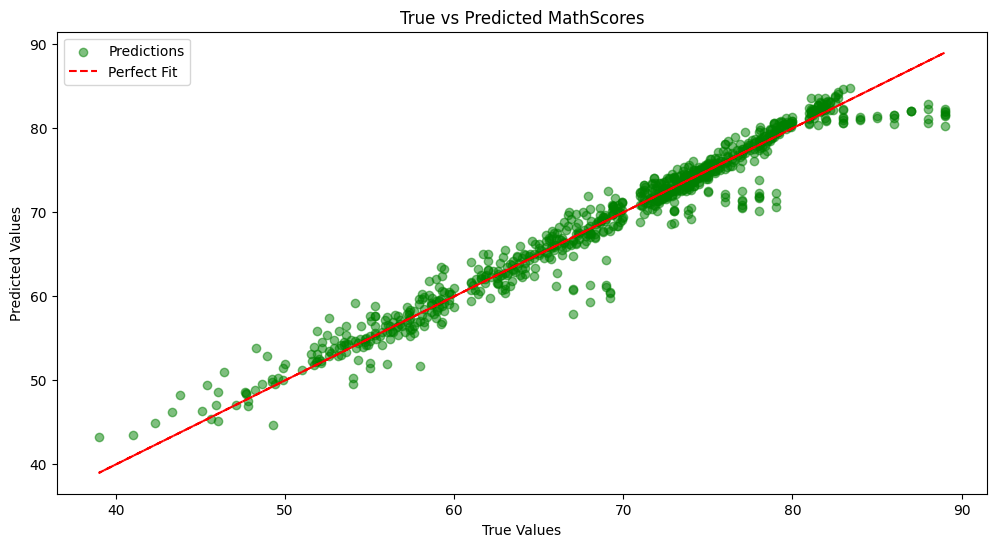

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='green',alpha=.5, label="Predictions")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted MathScores")
plt.legend()
plt.show()

In [50]:
# ====> KNN Model <===== #

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [52]:
# Initialize the K-NN classifier
from sklearn.neighbors import KNeighborsRegressor
k = 2 # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='minkowski',p=1)

In [53]:
# Train the model
knn.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=2, p=1, weights='distance')

In [54]:
# Make predictions on the test set
Y_pred = knn.predict(X_test2)

In [55]:
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.6903514215117923
Mean Absolute Error: 1.0681598821119294
R-squared: 0.9586432506084304


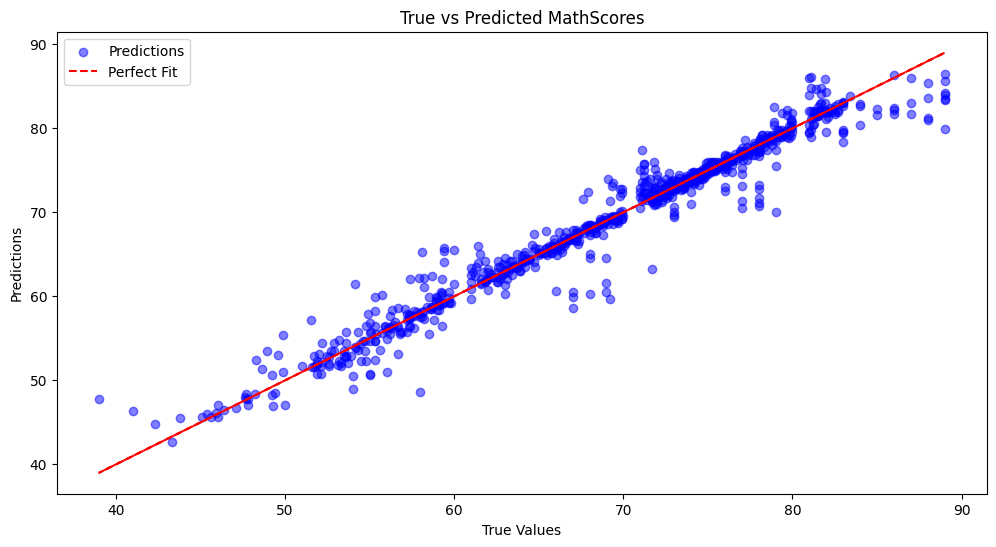

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, Y_pred,color='blue',alpha=.5,label="Predictions")
plt.plot(y_test, y_test, color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted MathScores")
plt.legend()
plt.show()